# Aprendizaje Supervisado: Laboratorio 1

## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.

Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [1]:
# cargar datos de entrenamiento y evaluación
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import numpy as np
from sklearn.decomposition import PCA

import seaborn

%matplotlib inline

train = pd.read_csv('datasets/lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
Y_train = train['TARGET']
test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
Y_test = test['TARGET']

### Ejercicio 1a:

Primero imprima una descripción básica de los datos.

Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?

Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?


In [2]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
0,-15.0,20.0,26.0,17.0,117.0,-1.099921,-0.366696,0.136307,-0.777322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
1,35.0,87.0,-17.0,54.0,38.0,-0.507798,-0.774667,-0.879107,-1.159231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,82.0,75.0,116.0,87.0,130.0,-0.219868,0.157875,0.386982,0.150254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,133.0,138.0,87.0,124.0,61.0,0.371992,-0.157556,-0.484258,-0.109378,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,-17.0,23.0,17.0,16.0,109.0,-1.099966,-0.436268,0.028073,-0.869315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0


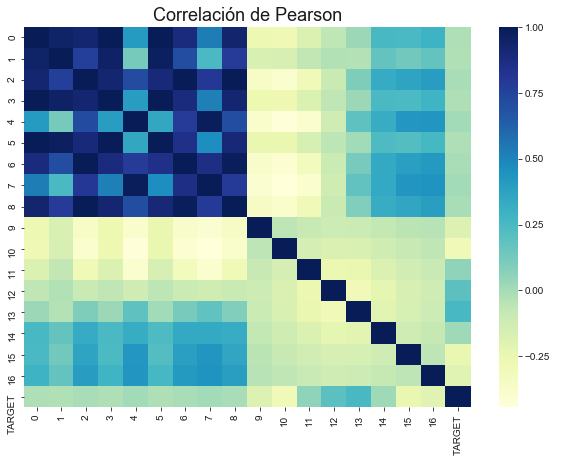

In [4]:
# AYUDA: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification
t_corr = train.corr()

plt.figure(figsize=(10,7))

seaborn.heatmap(t_corr, cmap="YlGnBu")
seaborn.set(font_scale=1.5,style='white')

plt.title('Correlación de Pearson')
plt.show()

In [5]:
#En el cuadrante número dos, se puede ver como las features se encuentran fuertemente correlacionadas
#(los coeficientes de Pearson se presentan entre 0.5 y 1). 
#Mientras que para el cuadrante cuatro, podría decirse que casi no existe correlación.
# A destacar son los cuadrantes 1 y 3, los cuales parecen encontrarse reflejados.

In [6]:
# Reducción de componentes con n=2
pca=PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
print('Dimensión del dataset después de aplicar PCA:',X_reduced.shape)

Dimensión del dataset después de aplicar PCA: (400, 2)


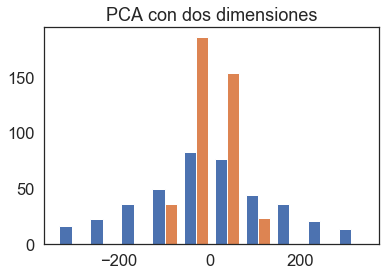

In [7]:
plt.figure()
plt.title('PCA con dos dimensiones')
plt.hist(x=X_reduced,)
plt.show()

Text(0.5,1,'PCA con dos dimensiones')

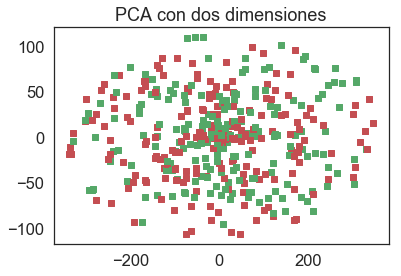

In [8]:
plt.scatter(X_reduced[:, 0], X_reduced[:,1], marker='s', c=['r','g'])
plt.title('PCA con dos dimensiones')


### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

**Preguntas:**
- ¿Cuál es la accuracy?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique la SVM para lograr una accuracy en train de 1.0.

In [3]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=0)  # CAMBIAR!
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 0.5025


* La accuracy en el dataset de entrenamiento es de *0.5025*

Al ser tan bajo este valor, nos lleva a pensar que el modelo no está pudiendo generalizar, es decir presenta un problema de bias.

In [10]:
# Definición de hiperparámetros para SVM lineal
penalty = 'l2' # string, ‘l1’ or ‘l2’
loss = 'hinge' # string, ‘hinge’ or ‘squared_hinge’ 

# Creamos un diccionario con todos los valores a ser evaluados para los parámetros
param_grid = {
    'C': [1, 2, 10, 100], # Penalidad del parámetro C del termino del error
    'tol': [0.1, 0.01, 0.0001, 0.00001]
}

model = LinearSVC(penalty=penalty, loss = loss, random_state=0)

# Aplicamos Grid search con 5-folds (los folds quedan definidos con el parámetro cv)
model_val = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
model_val.fit(X_train, Y_train)

# Visualización de los resultados obtenidos
print("Mejor conjunto de hiperparámetros para los datos de entrenamiento:")
print(model_val.best_params_, end="\n\n")

print('Exactitud para datos de entrenamiento: %.2f' %  accuracy_score(Y_train, model_val.predict(X_train)))


Mejor conjunto de hiperparámetros para los datos de entrenamiento:
{'C': 1, 'tol': 0.1}

Exactitud para datos de entrenamiento: 0.50


### Conclusión

Después de haber explorado los distintos hiperparámetros a través de grid search, el modelo no mejora el accurracy. Un hipótesis que planteo entonces, es que los datos no responden a un modelo del tipo lineal.

Por ello voy a implementar un modelo que no sea lineal de SVC para probar distintos kernels.

In [10]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

print('Predicted accuracy:', accuracy_score(Y_train, Y_pred))

Predicted accuracy: 1.0


### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

**Preguntas:**
- ¿Cuál es la accuracy en test?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.
La accuracy en train puede ser menos de 1.0.

Puede buscar los valores apropiados a mano o usar grid search.

In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
clf = LinearSVC(random_state=0)  # CAMBIAR!
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en train:	 0.5025
Accuracy en test:	 0.43


La accuracy del test es de 0.43, esto se debe a un problema de bias. Esto produce que el modelo no pueda generalizar sobre los datos.

In [12]:
model = SVC(kernel='poly')
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)

print('Train predicted accuracy:', accuracy_score(Y_train, Y_train_pred))

model.fit(X_test, Y_test)
Y_test_pred = model.predict(X_test)

print('Test predicted accuracy:', accuracy_score(Y_test, Y_test_pred))

Train predicted accuracy: 0.92
Test predicted accuracy: 1.0


## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [1]:
# cargar los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
del train['PassengerId']  # eliminar ids
del train['Embarked']
del train['Cabin']
del train['Name']
del train['Sex']
del train['Ticket']
del train['Age']
# COMPLETAR: eliminar las columnas que no tienen números, y las que tienen datos incompletos.

In [4]:
# entrenar la misma Random Forest, e imprimir el out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7172


### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?

In [58]:
# cargar nuevamente los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age
train.describe()

# Pandas presenta que la media de la edad es ~29.6991. Entonces tomaré como valor medio 30 años.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
train['Age'].fillna(30, inplace=True)

In [62]:
# COMPLETAR: agregar columna con el largo del nombre
import numpy as np

items_aux = []
for i, item in enumerate(train['Name']):
    items_aux.append(len(item))

train['name_len'] = np.array(items_aux)

In [63]:
# COMPLETAR: poner 1 en lugar de 'female' y 0 en lugar de 'male'
# AYUDA: DEFINIR LA FUNCIÓN f Y HACER:
# train['Sex'] = train['Sex'].apply(f)

def setSexValue(sex):
    if sex == 'male':
        return 0
    else:
        return 1
    
train['Sex'] = train['Sex'].apply(setSexValue)
train['Sex']

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [64]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
del train['PassengerId']  # eliminar ids
del train['Embarked']
del train['Cabin']
del train['Ticket']

# Borro las columnas que van haciendo falta para cada corrida en particular
#del train['Age']
del train['Name']
#del train['Sex']


In [65]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# entrenar el Random Forest, e imprimir out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8283


### Resultados

A continuación se presentan los resultados para OOB, de acuerdo a cada cambio requerido.

* Edad con media: 0.7250
* Longitud del nombre: 0.7407
* Sexo: 0.7172

* Aplicando todos los pasos de trabajo de features: 0.8283